# Project Work Part 1

## Requirements:
Consider the following European options:
- Vanilla call/put
- Digital cash-or-nothing call/put
- Digital asset-or-nothing call/put

Derive and implement the following models to value these options in Python:
1. Black-Scholes model
2. Bachelier model
3. Black76 model
4. Displaced-diffusion model

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Black-Scholes Model

Underlying asset price SDE:
$$dS_t = r S_t dt + \sigma S_t dW^\mathbb{Q}_t \tag{1.0}$$

### Vanilla Options
$$V_C = S_0\Phi(d_1) - Ke^{-r(T)}\Phi(d_2) \tag{1.1}$$

where
- $d_2 = \frac{ln(\frac{S_0}{K}) + (r - \frac{1}{2}\sigma^2)(T)}{\sigma \sqrt{T}}$
- $d_1 = \frac{ln(\frac{S_0}{K}) + (r + \frac{1}{2}\sigma^2)(T)}{\sigma \sqrt{T}} = d_2 + \sigma \sqrt{T}$


In the case of a vanilla put option, where $H(T,S) = max(K - S_T,0)$, the option pricing formula is:

$$V_P = Ke^{-r(T)}\Phi(-d_2) - S_0\Phi(-d_1) \tag{1.2}$$

### CON Options
The Black-scholes pricing model for a CONC (with an expected payout of a unit dollar) is as follows:

$$V_{CONC} = e^{-r(T)}\Phi(d_2) \tag{1.3}$$

Correspondingly, for a CONP is:

$$V_{CONP} = e^{-r(T)}\Phi(-d_2)\tag{1.4}$$

### AON Options
The Black-scholes pricing model for an AONC is as follows:

$$V_{AONC} = S_0\Phi(d_1)\tag{1.5}$$

Correspondingly, for an AONP is:

$$V_{AONP} = S_0\Phi(-d_1)\tag{1.6}$$

In [ ]:
# Create function to price vanilla options analytically using Black-Scholes Model
def black_scholes_option_pricer(S, K, r, T, sigma, call = True, mode = None):
    '''
    Function calculates option prices based on Black-scholes model.
    Three modes available: Vanilla (default), Cash-or-Nothing (CON), Asset-or-Nothing (AON)
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: interest rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option
    call: default True. True if pricing call options; otherwise False
    Mode: default None. If specified, CON: Cash-or-Nothing, AON: Asset-or-Nothing

    Outputs:
    Option Prices.
    Note: For CON, the output is based on an expected per unit dollar payout.
    '''

    d2 = (np.log(S/K) +(r - 0.5*np.square(sigma))*(T))/(sigma*np.sqrt(T))
    d1 = d2 + sigma*np.sqrt(T)
    
    d2 = d2 if call == True else -d2
    d1 = d1 if call == True else -d1

    if mode == 'CON':
      option_values = np.exp(-r*T)*scipy.stats.norm.cdf(d2)

    elif mode == 'AON':
      option_values = S*scipy.stats.norm.cdf(d1)

    else:
      option_values = S*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
      option_values = option_values if call == True else -option_values

    return option_values

#Bachelier Model (based on original model)

Underlying asset price SDE:
$$dS_t = \sigma_N dW_t^{\mathbb{Q}}\tag{2.0}$$

Where $\sigma_N = \sigma S_0$, $\sigma_N$ is the absolute price volatilty, whereas $\sigma$ is the relative price volatility.

Integrating this SDE, we can show that the stock price process as

$$S_{T} = S_{0} + \sigma_N W_{T}^{\mathbb{Q}}\tag{2.1}$$

### Vanilla Options
$$V_{C} = e^{-rT}[(S_{0}-K)\Phi(d)+\sigma_N\sqrt{T}\phi(d)]\tag{2.2}$$

where
- $d_N =  \frac{S_{0}-K}{\sigma_N \sqrt{T}}$

$$V_{P} = e^{-rT}[(K-S_{0})\Phi(-d)+\sigma_N\sqrt{T}\phi(-d)]\tag{2.3}$$

### CON Options
The Bachelier pricing model for a CONC (with an expected payout of a unit dollar is as follows:

$$V_{CONC} = e^{-rT}\Phi(d_N)\tag{2.4}$$

Correspondingly, for a CONP is:

$$V_{CONP} = e^{-rT}\Phi(-d_N)\tag{2.5}$$

### AON Options
The Bachelier pricing model for an AONC is as follows:

$$V_{AONC} = e^{-rT}[S_{0}\Phi(d_N)+\sigma_N\sqrt{T}\phi(d_N)]\tag{2.6}$$
Correspondingly, for an AONP is:


$$V_{AONP} = e^{-rT}[S_{0}\Phi(-d_N)-\sigma_N\sqrt{T}\phi(-d_N)]\tag{2.7}$$

In [ ]:
def original_bachelier_option_pricer(S, K, r, T, sigma, call = True, mode = None):
    '''
    Function calculates option prices based on Bachelier model.
    Three modes available: Vanilla (default), Cash-or-Nothing (CON), Asset-or-Nothing (AON)
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: interest rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option - this is the absolute implied volatilty instead of relative implied volatility
    call: default True. True if pricing call options; otherwise False
    Mode: default None. If specified, CON: Cash-or-Nothing, AON: Asset-or-Nothing

    Outputs:
    Option Prices.
    Note: For CON, the output is based on an expected per unit dollar payout.
    '''

    d = (S - K)/(sigma * np.sqrt(T))

    #initializing d for call and put
    d = d if call == True else -d

    #calculating the option values
    if mode == 'CON':
      option_values = np.exp(-r*T) * scipy.stats.norm.cdf(d)
    elif mode == 'AON':
      if call == True:
        option_values = np.exp(-r*T)*((S * scipy.stats.norm.cdf(d)) + (sigma * np.sqrt(T) * scipy.stats.norm.pdf(d)))
      else:
        option_values = np.exp(-r*T)*((S * scipy.stats.norm.cdf(d)) - (sigma * np.sqrt(T) * scipy.stats.norm.pdf(d)))
    else: 
      if call == True: 
        option_values = np.exp(-r*T)*((S-K) * scipy.stats.norm.cdf(d) + sigma * np.sqrt(T) * scipy.stats.norm.pdf(d))
      else:
        option_values = np.exp(-r*T)*(-(S-K) * scipy.stats.norm.cdf(d) + sigma * np.sqrt(T) * scipy.stats.norm.pdf(d))

    return option_values

## Bachelier Model (Alternative Method)

Underlying asset price SDE:

$$dS(t) = rS(t)dt + \sigma_N d\mathbb{W^Q}(t) \tag{2.0}$$

Note: $\sigma_N$ is the implied volatility of the price instead of the return, i.e. $\sigma_N = \sigma_{rel} \times S_0$

Starting with 
$$dS_t = rS_tdt + \sigma_NdW_t^\mathcal{Q}$$

Let $Y_t = f(t, S_t)$, and $f(t, x) = xe^{-rt}$.
Then, $f_t = -xre^{-rt}$, $f_x = e^{-rt}$, $f_{xx} = 0$.

By It$\hat{o}$'s Lemma,

\begin{aligned}
    dY_t &= -rS_te^{-rt}dt + e^{-rt}dS_t \\
    &= \sigma_N e^{-rt} dW_t^\mathcal{Q}
\end{aligned}


Integrating both sides from 0 to T, and divide by $e^{-rT}$

\begin{aligned}
    S_T &= S_0e^{rT} + \int_0^T \sigma_N e^{r(T-t)} dW_t^\mathcal{Q}\\
    &= S_0e^{rT} + \sigma_N \sqrt{\frac{e^{2rT}-1}{2r}}Z
\end{aligned}


where $Z \sim N(0,1)$, since


\begin{aligned}
    \mathbb{E}\bigg[\int_0^T \sigma_N e^{r(T-t)} dW_t^\mathcal{Q}\bigg] & = 0
\end{aligned}



\begin{aligned}
    \mathbb{E}\bigg[\bigg(\int_0^T \sigma_N e^{r(T-t)} dW_t^\mathcal{Q}\bigg)^2\bigg] & = \mathbb{E}\bigg[\int_0^T \sigma_N^2 e^{2r(T-t)} dt\bigg] & \text{by It\^o's Isometry}\\
    & = \sigma_N^2 \bigg(\frac{e^{2rT}-1}{2r}\bigg)
\end{aligned}


$\int_0^T \sigma_N e^{r(T-t)} dW_t^\mathcal{Q} \sim N\bigg(0, \sigma_N^2 \bigg(\frac{e^{2rT}-1}{2r}\bigg)\bigg)$



### Vanilla Options

The value of a call option is:

$$\begin{aligned}V_c &= e^{-r(T)}\bigg(\int_{-d_N}^{\infty}\bigg(S_0e^{rT}-K\bigg) \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2} dz + \int_{-d_N}^{\infty} \sigma_N \sqrt{\frac{e^{2r(T)}-1}{2r}}Z\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z^2} dz\bigg)\\
&= \bigg(S_0 - Ke^{-r(T)} \bigg) \Phi(d_N) + \sigma_N \sqrt{\frac{1 - e^{-2r(T)}}{2r}} \phi(d_N)\end{aligned} \tag{2.1}$$

Where $\Phi(\cdot)$ is the CDF of the standard distribution and $\phi(\cdot)$ is its probability density function (PDF).<br>


$ d_N = \frac{S_0 - Ke^{-r(T)}}{\sigma_N \sqrt{\frac{1-e^{-2r(T)}}{2r}}}$


Correspondingly, by put-call parity, the put option value at time $t$ is:

$$V_p = \bigg(Ke^{-r(T)} - S_0 \bigg) \Phi(-d_N) + \sigma_N \sqrt{\frac{1-e^{-2r(T)}}{2r}} \phi(d_N) \tag{2.2}$$

### CON Options
The option price of a CONC is as follows:

$$V_{CONC} = e^{-rT}\Phi(d_N) \tag{2.3}$$

Correspondingly, for a CONP is:

$$V_{CONP} = e^{-rT}\Phi(-d_N)\tag{2.4}$$

### AON Options

The option price for an AONC is as follows:

$$V_{AONC} = S_0\Phi(d_N) +  \sigma_N \sqrt{\frac{1 - e^{-2r(T)}}{2r}} \phi(d_N) \tag{2.5}$$

Correspondingly, for an AONP is:
$$V_{AONP} = S_0 \Phi(-d_N) -  \sigma_N \sqrt{\frac{1 - e^{-2r(T)}}{2r}} \phi(-d_N) \tag{2.6}$$

In [ ]:
def alternative_bachelier_option_pricer(S, K, r, T, sigma, call = True, mode = None):
    '''
    Function calculates option prices based on Bachelier model.
    Three modes available: Vanilla (default), Cash-or-Nothing (CON), Asset-or-Nothing (AON)
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: interest rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option - this is the absolute implied volatilty instead of relative implied volatility
    call: default True. True if pricing call options; otherwise False
    Mode: default None. If specified, CON: Cash-or-Nothing, AON: Asset-or-Nothing

    Outputs:
    Option Prices.
    Note: For CON, the output is based on an expected per unit dollar payout.
    '''

    A = S - K*np.exp(-r*(T))
    B = sigma*np.sqrt((1 - np.exp(-2*r*(T)))/(2*r))
    dN = A*np.exp(r*(T))/B
    
    if mode == 'CON':
      option_values = np.exp(-r*T)*scipy.stats.norm.cdf(dN) if call == True else np.exp(-r*T)*scipy.stats.norm.cdf(-dN)

    elif mode == 'AON':
      option_values = S*scipy.stats.norm.cdf(dN) + B*scipy.stats.norm.pdf(dN) if call == True else\
      S*scipy.stats.norm.cdf(-dN) - B*scipy.stats.norm.pdf(dN)
    
    else:
      option_values = A*scipy.stats.norm.cdf(dN) + B*scipy.stats.norm.pdf(dN) if call == True else\
      -A*scipy.stats.norm.cdf(-dN) + B*scipy.stats.norm.pdf(dN)
    
    return option_values

## Black76 Model

Underlying asset price SDE:
$$dS_t = r S_t dt + \sigma S_t dW_t \tag{4.0}$$


Applying Itô's formula to function $f(t,x) = e^{r(T-t)}x$ give us the SDE for the forward price.

Forward price SDE:
$$dF_t = \sigma F_t dW_t\tag{4.1}$$

### Vanilla Options
$$V_C = e^{-rT}[F_0\Phi(d_1) - K\Phi(d_2)] \tag{4.2}$$

where
- $d_2 =  \frac{log(\frac{F_0}{K}) - (\frac{1}{2}\sigma^2)(T)}{\sigma \sqrt{T}}$

- $d_1 =  \frac{log(\frac{F_0}{K}) + (\frac{1}{2}\sigma^2)(T)}{\sigma \sqrt{T}}$



$$V_P = e^{-rT}[K\Phi(-d_2)-F_0\Phi(-d_1)] \tag{4.3}$$

### CON Options
The Black76 pricing model for a CONC (with an expected payout of a unit dollar is as follows:

$$V_{CONC} = e^{-r(T)}\Phi(d_2) \tag{4.4}$$

Correspondingly, for a CONP is:

$$V_{CONP} = e^{-r(T)}\Phi(-d_2)\tag{4.5}$$

### AON Options
The Black76 pricing model for an AONC is as follows:

$$V_{AONC} = F_0e^{-r(T)}\Phi(d_1)\tag{4.6}$$

Correspondingly, for an AONP is:

$$V_{AONP} = F_0e^{-r(T)}\Phi(-d_1)\tag{4.7}$$

In [ ]:
#create a function to price vanilla, CON and AON using Black76 model
def black76_option_pricer(S, K, r, T, sigma, call = True, mode = None):
    ''' 
    Function calculates option prices based on Black76 Model.
    Three modes available: Vanilla (default), Cash-or-Nothing (CON), Asset-or-Nothing (AON)
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: interest rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option
    call: default True. True if pricing call options; otherwise False
    Mode: default None. If specified, CON: Cash-or-Nothing, AON: Asset-or-Nothing

    Outputs:
    Option Prices.
    Note: For CON, the output is based on an expected per unit dollar payout.
    '''
    #calculate the forward price
    F = S * np.exp(r*T)

    d1 = (np.log(F/K) + (np.square(sigma)*T)/2)/(sigma * np.sqrt(T))
    d2 = (np.log(F/K) - (np.square(sigma)*T)/2)/(sigma * np.sqrt(T))

    #initializing d1 & d2 for call and put
    d1 = d1 if call == True else -d1
    d2 = d2 if call == True else -d2

    #calculating the option values
    if mode == 'CON':
      option_values = np.exp(-r*T)*scipy.stats.norm.cdf(d2)
    elif mode == 'AON':
      option_values = F*np.exp(-r*T)*scipy.stats.norm.cdf(d1)
    else:
      option_values = F*np.exp(-r*T)*scipy.stats.norm.cdf(d1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
      option_values = option_values if call == True else -option_values

    return option_values



## Displaced-Diffusion Model

Consider that the underlying forward price SDE is as follows:
$$dF_t = \sigma \bigg[\beta F_t + (1-\beta)F_0 \bigg]dW_t \tag{5.0}$$

Solving the SDE, we get:
$$F_T = \frac{F_0}{\beta}exp\bigg[-\frac{\beta^2\sigma^2T}{2} + \beta \sigma W_T \bigg] - \frac{1-\beta}{\beta}F_0 \tag{5.1}$$

Drawing comparison with the Black76 Model, we can do the following transformation:

| Parameter | Displaced-Diffusion Model | Transformed for Black76 |
| --- | :-: | :-: |
| Implied Volatility | $\sigma$ | $\sigma \beta$ |
| Forward price | $F_0$ | $F_0/\beta$ |
| Strike Price | K | $K + \frac{1-\beta}{\beta}F_0$ |

### Vanilla Options

The call option value at time $t$ is:

$$V_C = e^{-r(T)}\bigg[\frac{F_0}{\beta} \Phi (d_1) - (K + \frac{1-\beta}{\beta}F_0)\Phi (d_2)  \bigg] \tag{5.2}$$

where<br>
- $d_1 = \frac{log\frac{F_0}{\beta (K + \frac{1-\beta}{\beta}F_0)} + \frac{1}{2}\sigma^2\beta^2T}{\sigma \beta \sqrt{T}}$
- $d_2 = \frac{log\frac{F_0}{\beta (K + \frac{1-\beta}{\beta}F_0)} - \frac{1}{2}\sigma^2\beta^2T}{\sigma \beta \sqrt{T}}$

$$V_P = e^{-r(T)}\bigg[(K + \frac{1-\beta}{\beta}F_0)\Phi (-d_2) - \frac{F_0}{\beta}\Phi (-d_1)  \bigg] \tag{5.3}$$

### CON Options

The option price of a CONC is as follows:

$$V_{CONC} = e^{-r(T)}\Phi(d_2) \tag{5.4}$$

Correspondingly, for a CONP is:

$$V_{CONP} = e^{-r(T)}\Phi(-d_2)\tag{5.5}$$

### AON Options

The option price of a AONC is as follows:

$$V_{AONC} = e^{-r(T)}F_0\bigg(\frac{1}{\beta}\Phi(d_1) - \frac{1 - \beta}{\beta}\Phi(d_2)\bigg) \tag{5.6}$$

Correspondingly, for a AONP is:

$$V_{AONP} = e^{-r(T)}F_0\bigg(\frac{1}{\beta}\Phi(-d_1) - \frac{1 - \beta}{\beta}\Phi(-d_2) \bigg)\tag{5.7}$$

In [ ]:
#create a function to price vanilla, CON and AON using Displaced Diffusion model
def displaced_diffusion_option_pricer(S, K, r, T, sigma, beta, call = True, mode = None):
  ''' 
    Function calculates option prices based on Displaced-Diffusion Model.
    Three modes available: Vanilla (default), Cash-or-Nothing (CON), Asset-or-Nothing (AON)
    
    Inputs:
    S: underlying asset price at t; can be an array of prices
    K: strike price; can be an array of prices
    r: short rate, annualized
    T: time to expiration (also the T-t in our equations), in number of years
    sigma: implied volatility of the option
    beta: parameter to adjust degree of "mixture" between geometric and arithmetic BM
    call: default True. True if pricing call options; otherwise False
    Mode: default None. If specified, CON: Cash-or-Nothing, AON: Asset-or-Nothing

    Outputs:
    Option Prices.
    Note: For CON, the output is based on an expected per unit dollar payout.
    '''

  # Get forward price F_0
  F = S*np.exp(r*T)

  # Calculate d1 and d2
  d1 = (np.log(F/(beta*(K+(1-beta)/beta*F))) + (np.square(beta*sigma)*T)/2)/(beta*sigma * np.sqrt(T))
  d2 = (np.log(F/(beta*(K+(1-beta)/beta*F))) - (np.square(beta*sigma)*T)/2)/(beta*sigma * np.sqrt(T))

  #initializing d1 & d2 for call and put
  d2 = d2 if call == True else -d2
  d1 = d1 if call == True else -d1

  #calculating the option values
  if mode == 'CON':
    option_values = np.exp(-r*T)*scipy.stats.norm.cdf(d2)

  elif mode == 'AON':
    option_values = np.exp(-r*T)*F*(1/beta*scipy.stats.norm.cdf(d1) - (1-beta)/beta*scipy.stats.norm.cdf(d2))

  else:
    option_values = F/beta*np.exp(-r*T)*scipy.stats.norm.cdf(d1) - (K+(1-beta)/beta*F)*np.exp(-r*T)*scipy.stats.norm.cdf(d2)
    option_values = option_values if call == True else -option_values

  return option_values

# Code Testing Area

In [ ]:
# Define a range of strike prices K
K_array = np.arange(20, 81, 1)
S = 50
r = 0.05
sigma = 0.30
T = 0.50
X = 20
beta = 0.50

In [ ]:
BS_Van_Call = black_scholes_option_pricer(S, K_array, r, T, sigma)
BS_Van_Put = black_scholes_option_pricer(S, K_array, r, T, sigma, call = False)
BS_Con_Call = X*black_scholes_option_pricer(S, K_array, r, T, sigma, mode = 'CON')
BS_Con_Put = X*black_scholes_option_pricer(S, K_array, r, T, sigma, call = False, mode = 'CON')
BS_Aon_Call = black_scholes_option_pricer(S, K_array, r, T, sigma, mode = 'AON')
BS_Aon_Put = black_scholes_option_pricer(S, K_array, r, T, sigma, call = False, mode = 'AON')

In [ ]:
Bach_Van_Call = original_bachelier_option_pricer(S, K_array, r, T, sigma*S)
Bach_Van_Put = original_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False)
Bach_Con_Call = X*original_bachelier_option_pricer(S, K_array, r, T, sigma*S, mode = 'CON')
Bach_Con_Put = X*original_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False, mode = 'CON')
Bach_Aon_Call = original_bachelier_option_pricer(S, K_array, r, T, sigma*S, mode = 'AON')
Bach_Aon_Put = original_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False, mode = 'AON')

In [ ]:
Bach_Van_Call_method2 = alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S)
Bach_Van_Put_method2 = alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False)
Bach_Con_Call_method2 = X*alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S, mode = 'CON')
Bach_Con_Put_method2 = X*alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False, mode = 'CON')
Bach_Aon_Call_method2 = alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S, mode = 'AON')
Bach_Aon_Put_method2 = alternative_bachelier_option_pricer(S, K_array, r, T, sigma*S, call = False, mode = 'AON')

In [ ]:
B76_Van_Call = black76_option_pricer(S, K_array, r, T, sigma)
B76_Van_Put = black76_option_pricer(S, K_array, r, T, sigma, call = False)
B76_Con_Call = X*black76_option_pricer(S, K_array, r, T, sigma, mode = 'CON')
B76_Con_Put = X*black76_option_pricer(S, K_array, r, T, sigma, call = False, mode = 'CON')
B76_Aon_Call = black76_option_pricer(S, K_array, r, T, sigma, mode = 'AON')
B76_Aon_Put = black76_option_pricer(S, K_array, r, T, sigma, call = False, mode = 'AON')

In [ ]:
DD_Van_Call = displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta)
DD_Van_Put = displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta, call = False)
DD_Con_Call = X*displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta, mode = 'CON')
DD_Con_Put = X*displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta, call = False, mode = 'CON')
DD_Aon_Call = displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta, mode = 'AON')
DD_Aon_Put = displaced_diffusion_option_pricer(S, K_array, r, T, sigma, beta, call = False, mode = 'AON')

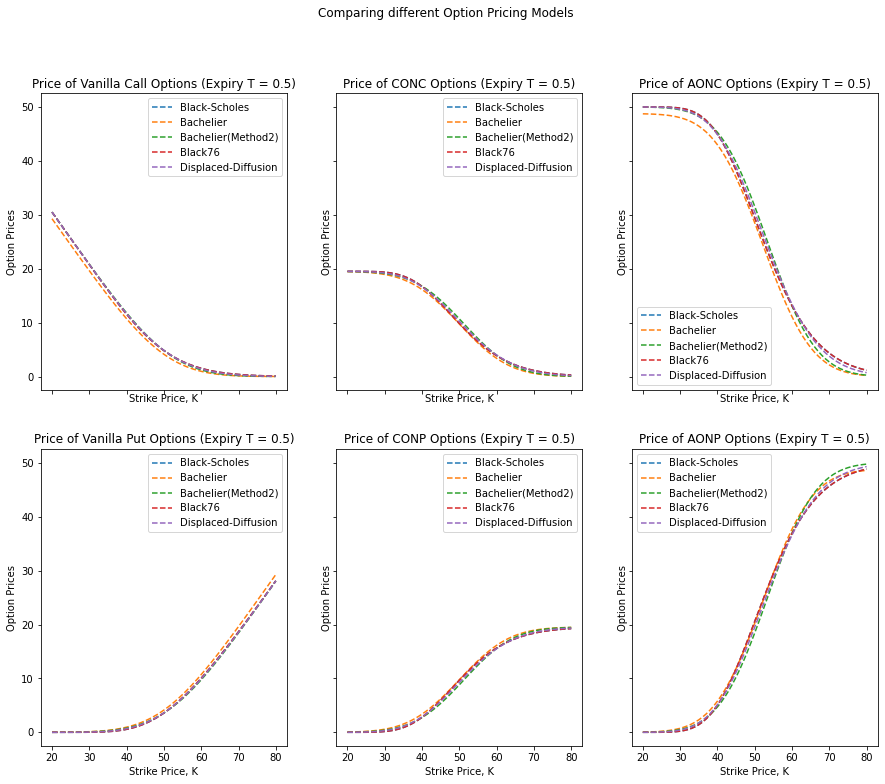

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 12), sharey = True, sharex = True)
fig.suptitle('Comparing different Option Pricing Models')

# First Set, Vanilla
axs[0,0].plot(K_array, BS_Van_Call, ls = '--')
axs[0,0].plot(K_array, Bach_Van_Call, ls = '--')
axs[0,0].plot(K_array, Bach_Van_Call_method2, ls = '--')
axs[0,0].plot(K_array, B76_Van_Call, ls = '--')
axs[0,0].plot(K_array, DD_Van_Call, ls = '--')
axs[0,0].set_title('Price of Vanilla Call Options (Expiry T = 0.5)')
axs[0,0].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)','Black76', 'Displaced-Diffusion'])

axs[1,0].plot(K_array, BS_Van_Put, ls = '--')
axs[1,0].plot(K_array, Bach_Van_Put, ls = '--')
axs[1,0].plot(K_array, Bach_Van_Put_method2, ls = '--')
axs[1,0].plot(K_array, B76_Van_Put, ls = '--')
axs[1,0].plot(K_array, DD_Van_Put, ls = '--')
axs[1,0].set_title('Price of Vanilla Put Options (Expiry T = 0.5)')
axs[1,0].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)', 'Black76', 'Displaced-Diffusion'])

# Second set, CON
axs[0,1].plot(K_array, BS_Con_Call, ls = '--')
axs[0,1].plot(K_array, Bach_Con_Call, ls = '--')
axs[0,1].plot(K_array, Bach_Con_Call_method2, ls = '--')
axs[0,1].plot(K_array, B76_Con_Call, ls = '--')
axs[0,1].plot(K_array, DD_Con_Call, ls = '--')
axs[0,1].set_title('Price of CONC Options (Expiry T = 0.5)')
axs[0,1].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)', 'Black76', 'Displaced-Diffusion'])

axs[1,1].plot(K_array, BS_Con_Put, ls = '--')
axs[1,1].plot(K_array, Bach_Con_Put, ls = '--')
axs[1,1].plot(K_array, Bach_Con_Put_method2, ls = '--')
axs[1,1].plot(K_array, B76_Con_Put, ls = '--')
axs[1,1].plot(K_array, DD_Con_Put, ls = '--')
axs[1,1].set_title('Price of CONP Options (Expiry T = 0.5)')
axs[1,1].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)', 'Black76', 'Displaced-Diffusion'])

# Last set, AON
axs[0,2].plot(K_array, BS_Aon_Call, ls = '--')
axs[0,2].plot(K_array, Bach_Aon_Call, ls = '--')
axs[0,2].plot(K_array, Bach_Aon_Call_method2, ls = '--')
axs[0,2].plot(K_array, B76_Aon_Call, ls = '--')
axs[0,2].plot(K_array, DD_Aon_Call, ls = '--')
axs[0,2].set_title('Price of AONC Options (Expiry T = 0.5)')
axs[0,2].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)', 'Black76', 'Displaced-Diffusion'])

axs[1,2].plot(K_array, BS_Aon_Put, ls = '--')
axs[1,2].plot(K_array, Bach_Aon_Put, ls = '--')
axs[1,2].plot(K_array, Bach_Aon_Put_method2, ls = '--')
axs[1,2].plot(K_array, B76_Aon_Put, ls = '--')
axs[1,2].plot(K_array, DD_Aon_Put, ls = '--')
axs[1,2].set_title('Price of AONP Options (Expiry T = 0.5)')
axs[1,2].legend(['Black-Scholes','Bachelier', 'Bachelier(Method2)', 'Black76', 'Displaced-Diffusion'])

for ax in axs.flat:
    ax.set(xlabel='Strike Price, K', ylabel='Option Prices')

plt.show()